## Import Libraries

In [39]:
# Import libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

## Overview about Data in Python

In [40]:
test_data = pd.read_csv('D:/Github/BigMart Sale/Data/test_data.csv')
data = pd.read_csv('D:/Github/BigMart Sale/Data/train_data.csv')
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data preprocessing

- The dataset has 8523 rows. The column 'Item_Weight' has 7060 rows and the column 'Outlet_Size' rows. So, I fill NaN rows for two columns.

In [42]:
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('max'))

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [43]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [44]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Small')

data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [46]:
row_nan = data[data.isna().any(axis=1)]

row_nan.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [47]:
df = data[data['Item_Weight'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [48]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [49]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True)


C:\Users\CONGTHUC\AppData\Local\Temp\ipykernel_25256\2308582239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True)


In [50]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

In [51]:
df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## EDA

<Axes: xlabel='Outlet_Size', ylabel='count'>

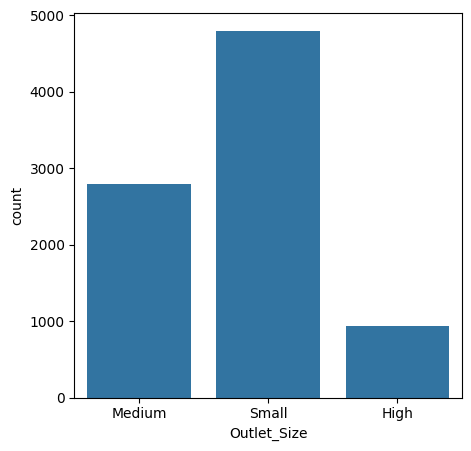

In [52]:
# count plot for outlet size
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size',data=df)

The outlet size "small" has a larger number of samples

<Axes: xlabel='Outlet_Type', ylabel='count'>

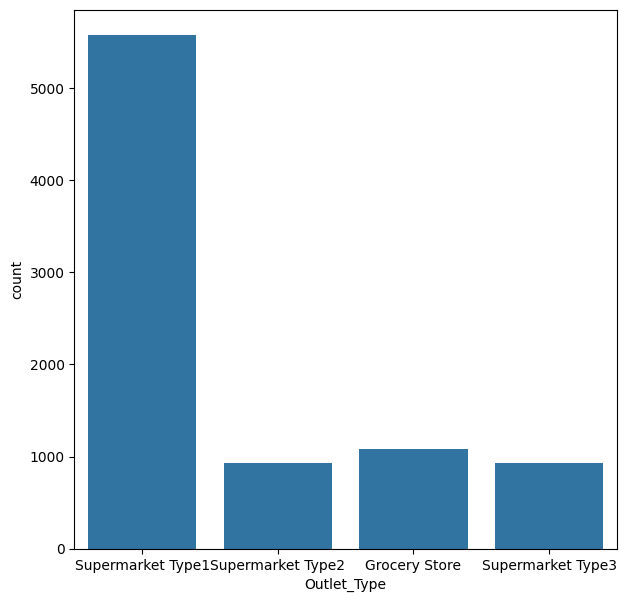

In [53]:
# count plot for outlet type
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Type',data=df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

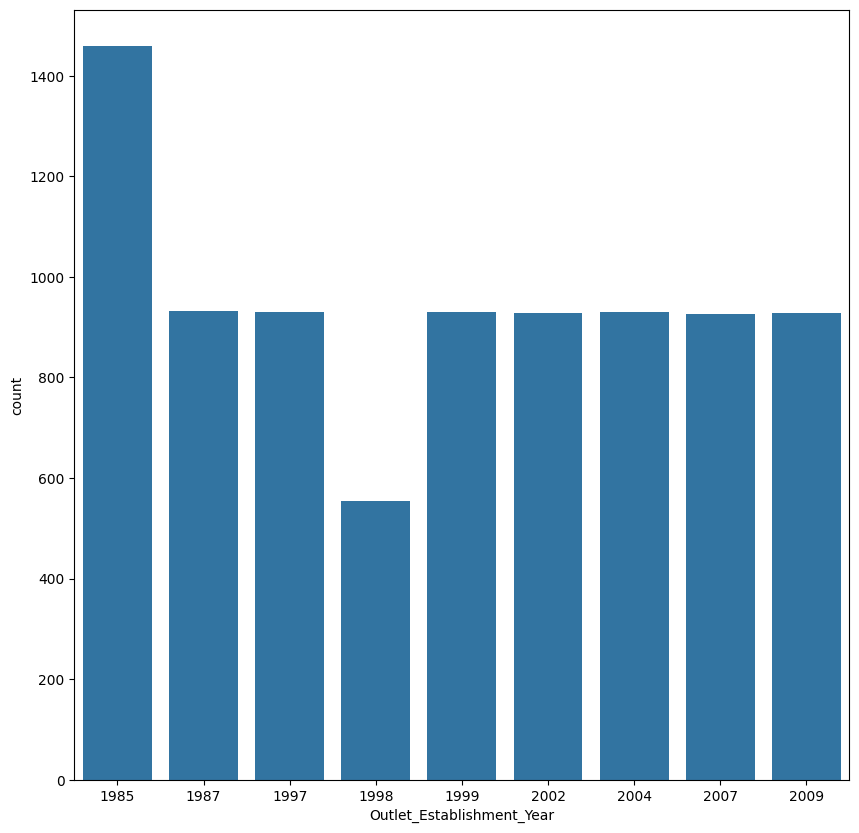

In [54]:
# countplot for outlet establishment year
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Establishment_Year',data=df)

C:\Users\CONGTHUC\AppData\Local\Temp\ipykernel_25256\2167995281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Item_Weight']),color='red')


<Axes: xlabel='Item_Weight', ylabel='Density'>

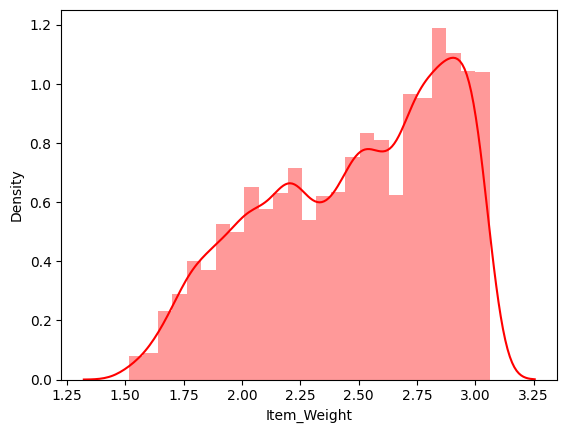

In [55]:
sns.distplot(np.log(df['Item_Weight']),color='red')

C:\Users\CONGTHUC\AppData\Local\Temp\ipykernel_25256\1012355526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'],color='red')


<Axes: xlabel='Item_Visibility', ylabel='Density'>

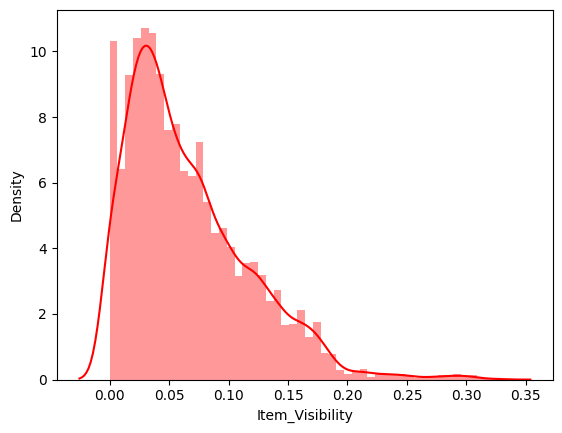

In [56]:
sns.distplot(df['Item_Visibility'],color='red')

C:\Users\CONGTHUC\AppData\Local\Temp\ipykernel_25256\1802611269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Item_MRP']),color='blue')


<Axes: xlabel='Item_MRP', ylabel='Density'>

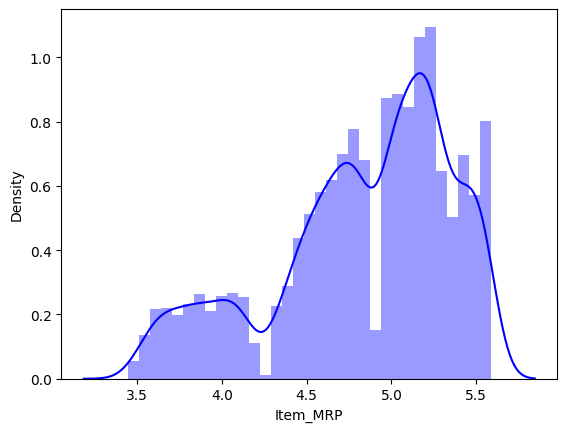

In [57]:
sns.distplot(np.log(df['Item_MRP']),color='blue')

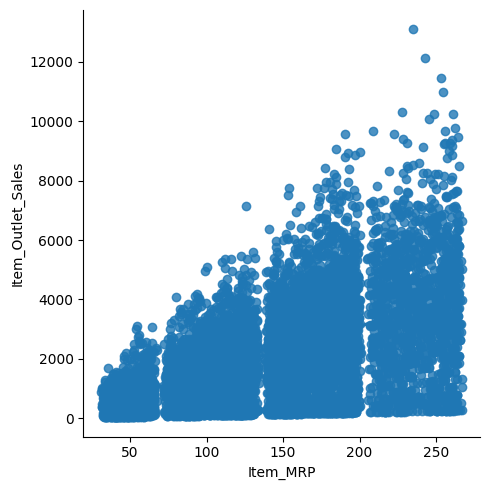

In [58]:
sns.lmplot(data=df, x="Item_MRP",y="Item_Outlet_Sales")

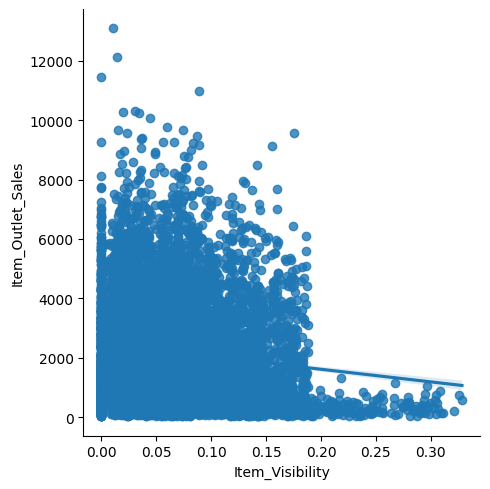

In [59]:
sns.lmplot(data=df,x="Item_Visibility",y="Item_Outlet_Sales")

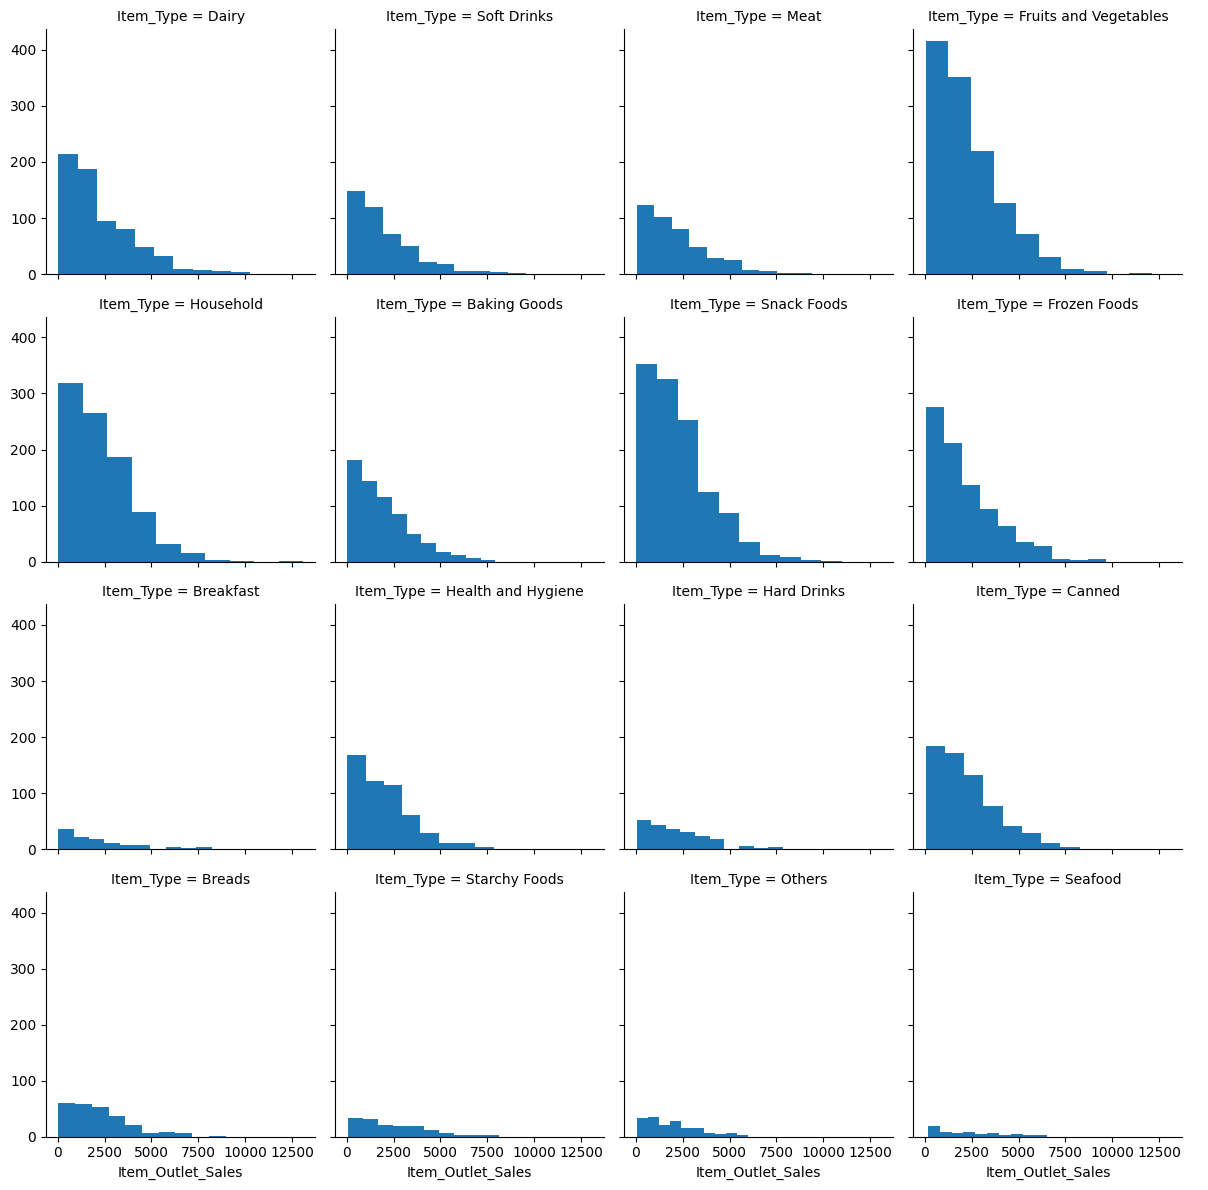

In [60]:
sns.FacetGrid(df, col='Item_Type',col_wrap=4)\
.map(plt.hist,'Item_Outlet_Sales')\
.add_legend();

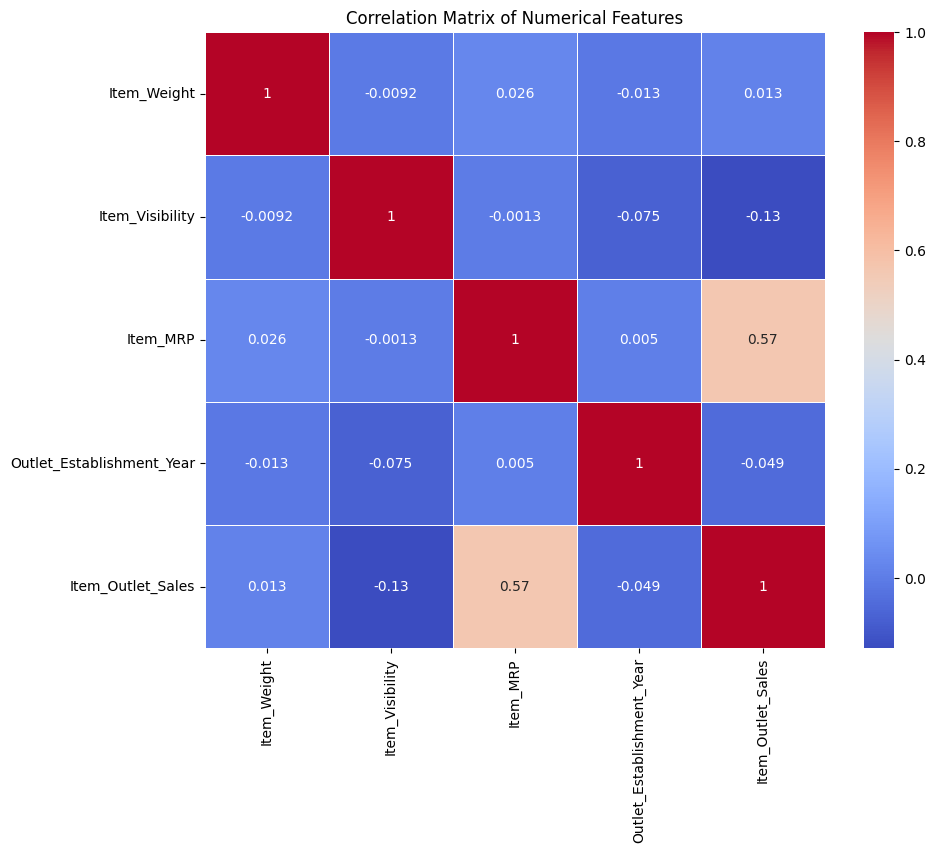

In [82]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [62]:
df.describe(include=['O']).T  # For categorical variables

,count,unique,top,freq
Item_Identifier,8519,1555,FDG33,10
Item_Fat_Content,8519,2,Low Fat,5516
Item_Type,8519,16,Fruits and Vegetables,1232
Outlet_Identifier,8519,10,OUT013,932
Outlet_Size,8519,3,Small,4797
Outlet_Location_Type,8519,3,Tier 3,3347
Outlet_Type,8519,4,Supermarket Type1,5577


In [63]:
cross_tab=pd.crosstab(index=df['Outlet_Size'],columns=df['Outlet_Location_Type'])
print(cross_tab)

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930       0    1860
Small                   1457    2785     555


In [64]:
result = chi2_contingency(cross_tab)

In [65]:
result

Chi2ContingencyResult(statistic=4804.376637943735, pvalue=0.0, dof=4, expected_freq=array([[ 261.14379622,  304.68599601,  366.17020777],
       [ 781.75020542,  912.0964902 , 1096.15330438],
       [1344.10599836, 1568.21751379, 1884.67648785]]))

In [66]:
#### dropped 4 rows from data and saved it in df ####

df['Outlet_Age']=2022 - df['Outlet_Establishment_Year']
df = df.drop(columns=['Outlet_Establishment_Year'])

df.head()

C:\Users\CONGTHUC\AppData\Local\Temp\ipykernel_25256\2366702141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Age']=2022 - df['Outlet_Establishment_Year']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


## Encoding

In [67]:
# Encoding

le=LabelEncoder()

col_encode=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in col_encode:
  df[i]=le.fit_transform(df[i])

df_new=df.drop(columns=['Item_Identifier'])
df_new=pd.get_dummies(df_new)

df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,23,...,False,False,False,False,False,False,False,False,False,False
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,13,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,23,...,False,False,False,False,True,False,False,False,False,False
3,19.20,1,0.000000,182.0950,0,2,2,0,732.3800,24,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,35,...,False,False,False,True,False,False,False,False,False,False


## Model training

In [71]:
from sklearn.model_selection import train_test_split
X=df_new.drop(columns=['Item_Outlet_Sales'])
y=df_new['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22222)

In [72]:
# names of models
models=[ ('lr',LinearRegression()),('RF',RandomForestRegressor()),
         ('GBM',GradientBoostingRegressor())]

In [73]:
def model_selection_function(x,y,cross_folds,model):
  scores=[]
  names=[]
  for i, j in model:
    cv_scores=cross_val_score(j,x,y,cv=cross_folds,n_jobs=-1)
    scores.append(cv_scores)
    names.append(i)
  for k in range(len(scores)):
    print(names[k],scores[k].mean())
  return

In [74]:
model_selection_function(X_train,y_train,3,models)

lr 0.49581782673707697
RF 0.5504502594742494
GBM 0.590501797066378


## Model Evaluation

In [77]:
from sklearn.metrics import r2_score


In [78]:
model_gbm=GradientBoostingRegressor()
model_gbm.fit(X_train,y_train)
y_pred=model_gbm.predict(X_test)
print("R2 of GBM is")
print(r2_score(y_test,y_pred))

R2 of GBM is
0.6097990746530662


In [80]:
model_gbm=LinearRegression()
model_gbm.fit(X_train,y_train)
y_pred=model_gbm.predict(X_test)
print("R2 of LR is")
print(r2_score(y_test,y_pred))

R2 of LR is
0.5113461424964414


In [81]:
model_gbm=RandomForestRegressor()
model_gbm.fit(X_train,y_train)
y_pred=model_gbm.predict(X_test)
print("R2 of RF is")
print(r2_score(y_test,y_pred))

R2 of RF is
0.5575499716492243
